In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1.csv file is loaded.
df = pd.read_csv('/content/drive/MyDrive/EWU Couses/CSE303  Practice-20251121T155013Z-1-001/CSE303  Practice/Fall 2025/CSE303 Lab 6 : Regression/Lab 6:  tast/synthetic_dataset.csv')
df

,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
0,7.0,Bachelor,Sales,28.0,35.0,112.836851
1,4.0,PhD,Engineering,28.0,27.0,104.791269
2,13.0,PhD,Engineering,24.0,23.0,113.136307
3,11.0,Master,Sales,19.0,23.0,104.239902
4,8.0,PhD,Engineering,22.0,75.0,104.025511
...,...,...,...,...,...,...
495,9.0,Bachelor,Engineering,25.0,42.0,107.474129
496,10.0,NaN,Sales,25.0,104.0,104.593824
497,14.0,Master,HR,18.0,38.0,100.522453
498,13.0,Bachelor,Engineering,13.0,38.0,92.666024


In [ ]:


#Fist 15 rows of the dataset.
print("displaying 1st 15 rows")
df.head(15)


displaying 1st 15 rows


,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
0,7.0,Bachelor,Sales,28.0,35.0,112.836851
1,4.0,PhD,Engineering,28.0,27.0,104.791269
2,13.0,PhD,Engineering,24.0,23.0,113.136307
3,11.0,Master,Sales,19.0,23.0,104.239902
4,8.0,PhD,Engineering,22.0,75.0,104.025511
5,NaN,Bachelor,Sales,12.0,44.0,91.462814
6,5.0,NaN,Engineering,8.0,86.0,70.353345
7,7.0,NaN,Engineering,17.0,115.0,89.015870
8,10.0,Bachelor,HR,24.0,86.0,103.622347
9,3.0,PhD,HR,13.0,NaN,80.578435


In [ ]:
# Last 15 rows of the dataset.
print("displaying last 15 rows")
df.tail(15)

displaying last 15 rows


,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
485,14.0,PhD,HR,23.0,104.0,113.890530
486,12.0,NaN,HR,4.0,NaN,80.288978
487,3.0,Master,HR,15.0,114.0,82.348289
488,7.0,PhD,Sales,13.0,74.0,79.355360
489,12.0,Bachelor,HR,13.0,67.0,94.317387
490,2.0,NaN,HR,18.0,101.0,77.415669
491,2.0,Master,HR,13.0,26.0,81.293400
492,7.0,Bachelor,HR,21.0,93.0,90.206803
493,6.0,NaN,Engineering,17.0,26.0,87.815827
494,3.0,NaN,HR,27.0,52.0,98.146579


**3.Check for any missing(null) values in the dataset(if needed).**

In [ ]:
# checking for any missing(null) values in the dataset(if needed).

df.isnull().sum()

,0
Experience,20
Education,135
Department,0
Projects_Completed,0
Training_Hours,20
Performance_Score,0


In [ ]:
df[df.isnull().any(axis=1)]

,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
5,NaN,Bachelor,Sales,12.0,44.0,91.462814
6,5.0,NaN,Engineering,8.0,86.0,70.353345
7,7.0,NaN,Engineering,17.0,115.0,89.015870
9,3.0,PhD,HR,13.0,NaN,80.578435
14,5.0,NaN,Sales,14.0,70.0,81.832076
...,...,...,...,...,...,...
490,2.0,NaN,HR,18.0,101.0,77.415669
493,6.0,NaN,Engineering,17.0,26.0,87.815827
494,3.0,NaN,HR,27.0,52.0,98.146579
496,10.0,NaN,Sales,25.0,104.0,104.593824


In [ ]:
#Showing null values of 'Experience' and 'Training_Hours'.

# Option 1: Show only the two columns of interest
#df[df[['Experience','Training_Hours']].isnull().any(axis=1)][['Experience','Training_Hours']]

# Option 2: Show all columns but only rows with nulls in those two columns (what you have now)
df[df[['Experience','Training_Hours']].isnull().any(axis=1)]

# Option 3: Show which specific values are null more clearly
#df.loc[df[['Experience','Training_Hours']].isnull().any(axis=1), ['Experience','Training_Hours']]

,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
5,NaN,Bachelor,Sales,12.0,44.0,91.462814
9,3.0,PhD,HR,13.0,NaN,80.578435
17,8.0,Bachelor,Sales,9.0,NaN,81.168218
36,1.0,Bachelor,Sales,25.0,NaN,89.155097
60,NaN,NaN,HR,7.0,97.0,87.099361
73,NaN,Bachelor,HR,17.0,34.0,92.597217
89,NaN,Bachelor,Sales,28.0,87.0,123.143213
92,12.0,Bachelor,Engineering,7.0,NaN,85.017389
94,10.0,Bachelor,Sales,4.0,NaN,66.237566
104,8.0,NaN,Sales,6.0,NaN,81.739279


In [ ]:
#calculating the mean, median, mode.
Experience_mean = df['Experience'].mean()
print(Experience_mean)
Experience_mean_roundup = round(Experience_mean)
print(Experience_mean_roundup)
Experience_mode = df['Experience'].mode()
print(Experience_mode)
Experience_median = df['Experience'].median()
print(Experience_median)

7.397916666666666
7
0    12.0
Name: Experience, dtype: float64
7.0


In [ ]:
#calculating mean,median,mod.
Training_Hours_mean = df['Training_Hours'].mean()
print(Training_Hours_mean)
Training_Hours_meana_roundup = round(Training_Hours_mean)
print(Training_Hours_meana_roundup)
Training_Hours_mode = df['Training_Hours'].mode()
print(Training_Hours_mode)
Training_Hours_median = df['Training_Hours'].median()
print(Training_Hours_median)

67.4625
67
0    70.0
Name: Training_Hours, dtype: float64
67.5


In [ ]:
#making copy of the dataFrame

df_copy = df.copy()
df_copy

,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
0,7.0,Bachelor,Sales,28.0,35.0,112.836851
1,4.0,PhD,Engineering,28.0,27.0,104.791269
2,13.0,PhD,Engineering,24.0,23.0,113.136307
3,11.0,Master,Sales,19.0,23.0,104.239902
4,8.0,PhD,Engineering,22.0,75.0,104.025511
...,...,...,...,...,...,...
495,9.0,Bachelor,Engineering,25.0,42.0,107.474129
496,10.0,NaN,Sales,25.0,104.0,104.593824
497,14.0,Master,HR,18.0,38.0,100.522453
498,13.0,Bachelor,Engineering,13.0,38.0,92.666024


In [ ]:
Experience_median_val = df['Experience'].median()
df_copy['Experience'].fillna(Experience_median_val)
df_copy.isnull().sum()

,0
Experience,20
Education,135
Department,0
Projects_Completed,0
Training_Hours,20
Performance_Score,0


In [ ]:

Training_Hours_median_val = df['Training_Hours'].median()
df_copy['Training_Hours'] = df_copy['Training_Hours'].fillna(Training_Hours_median_val)
df_copy.isnull().sum()

,0
Experience,20
Education,135
Department,0
Projects_Completed,0
Training_Hours,0
Performance_Score,0


In [ ]:
df_copy[df_copy.isnull().any(axis=1)]

,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
5,NaN,Bachelor,Sales,12.0,44.0,91.462814
6,5.0,NaN,Engineering,8.0,86.0,70.353345
7,7.0,NaN,Engineering,17.0,115.0,89.015870
14,5.0,NaN,Sales,14.0,70.0,81.832076
16,8.0,NaN,HR,7.0,40.0,76.400551
...,...,...,...,...,...,...
490,2.0,NaN,HR,18.0,101.0,77.415669
493,6.0,NaN,Engineering,17.0,26.0,87.815827
494,3.0,NaN,HR,27.0,52.0,98.146579
496,10.0,NaN,Sales,25.0,104.0,104.593824


In [ ]:
# creating another new copy version.
df_copy_2 = df.copy()
df_copy_2

,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
0,7.0,Bachelor,Sales,28.0,35.0,112.836851
1,4.0,PhD,Engineering,28.0,27.0,104.791269
2,13.0,PhD,Engineering,24.0,23.0,113.136307
3,11.0,Master,Sales,19.0,23.0,104.239902
4,8.0,PhD,Engineering,22.0,75.0,104.025511
...,...,...,...,...,...,...
495,9.0,Bachelor,Engineering,25.0,42.0,107.474129
496,10.0,NaN,Sales,25.0,104.0,104.593824
497,14.0,Master,HR,18.0,38.0,100.522453
498,13.0,Bachelor,Engineering,13.0,38.0,92.666024


In [ ]:
Experience_mean_val = df['Experience'].mean()
df_copy_2['Experience'] = df_copy_2['Experience'].fillna(Experience_mean_val)
df_copy_2.isnull().sum()

,0
Experience,0
Education,135
Department,0
Projects_Completed,0
Training_Hours,20
Performance_Score,0


In [ ]:
Training_Hours_mean_val = df['Training_Hours'].mean()
df_copy_2['Training_Hours'] = df_copy_2['Training_Hours'].fillna(Training_Hours_mean_val)
df_copy_2.isnull().sum()

,0
Experience,0
Education,135
Department,0
Projects_Completed,0
Training_Hours,0
Performance_Score,0


In [ ]:
df_copy_3 = df.copy()
df_copy_3

,Experience,Education,Department,Projects_Completed,Training_Hours,Performance_Score
0,7.0,Bachelor,Sales,28.0,35.0,112.836851
1,4.0,PhD,Engineering,28.0,27.0,104.791269
2,13.0,PhD,Engineering,24.0,23.0,113.136307
3,11.0,Master,Sales,19.0,23.0,104.239902
4,8.0,PhD,Engineering,22.0,75.0,104.025511
...,...,...,...,...,...,...
495,9.0,Bachelor,Engineering,25.0,42.0,107.474129
496,10.0,NaN,Sales,25.0,104.0,104.593824
497,14.0,Master,HR,18.0,38.0,100.522453
498,13.0,Bachelor,Engineering,13.0,38.0,92.666024


In [ ]:

Experience_mean_val = df['Experience'].mean()
Experience_mean_val_roundup = round(Experience_mean_val)
print(Experience_mean_val_roundup)
df_copy_3['Experience'] = df_copy_3['Experience'].fillna(Experience_mean_val_roundup)
df_copy_3.isnull().sum()

7


,0
Experience,0
Education,135
Department,0
Projects_Completed,0
Training_Hours,20
Performance_Score,0


In [ ]:
Training_Hours_mean_val = df['Training_Hours'].mean()
Training_Hours_mean_roundup = round(Training_Hours_mean_val)
print(Training_Hours_mean_roundup)
df_copy_3['Training_Hours'] = df_copy_3['Training_Hours'].fillna(Training_Hours_mean_roundup)
df_copy_3.isnull().sum()

67


,0
Experience,0
Education,135
Department,0
Projects_Completed,0
Training_Hours,0
Performance_Score,0


4.**Perform appropriate mapping if needed.**

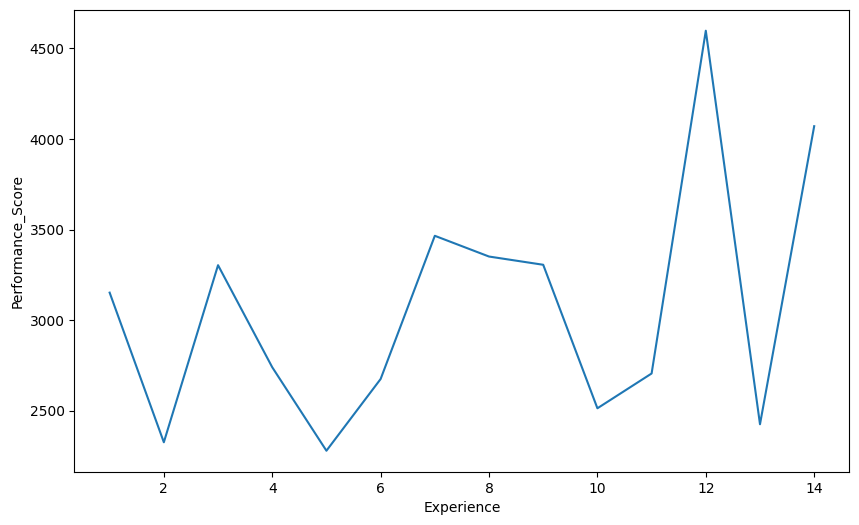

In [ ]:
# Performing appropriate mapping.
plt.figure(figsize=(10,6))
df.groupby('Experience')['Performance_Score'].sum().plot()
plt.xlabel('Experience')
plt.ylabel('Performance_Score')
plt.show()

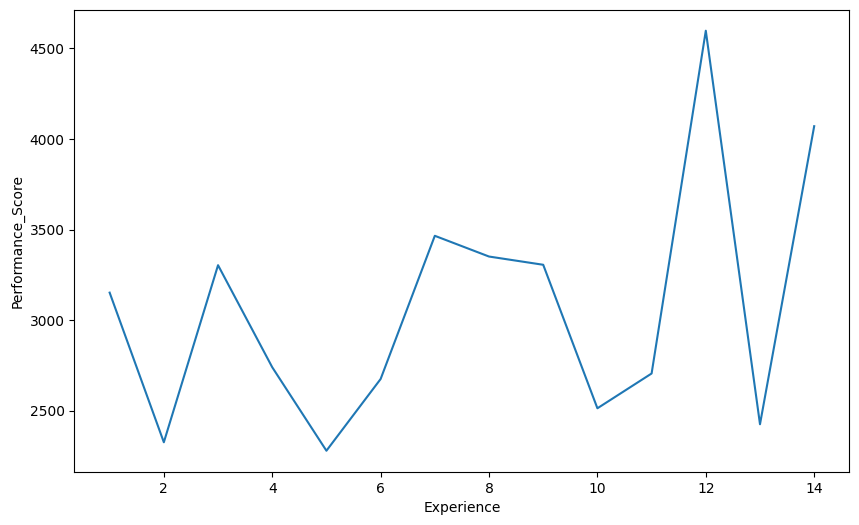

In [ ]:
plt.figure(figsize=(10, 6))
df_copy.groupby('Experience')['Performance_Score'].sum().plot()
plt.xlabel('Experience')
plt.ylabel('Performance_Score')
plt.show()

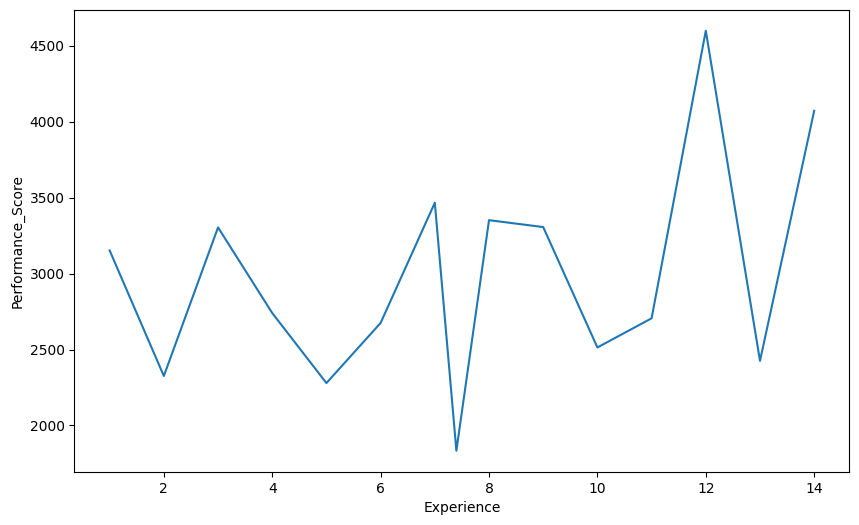

In [ ]:
plt.figure(figsize=(10, 6))
df_copy_2.groupby('Experience')['Performance_Score'].sum().plot()
plt.xlabel('Experience')
plt.ylabel('Performance_Score')
plt.show()

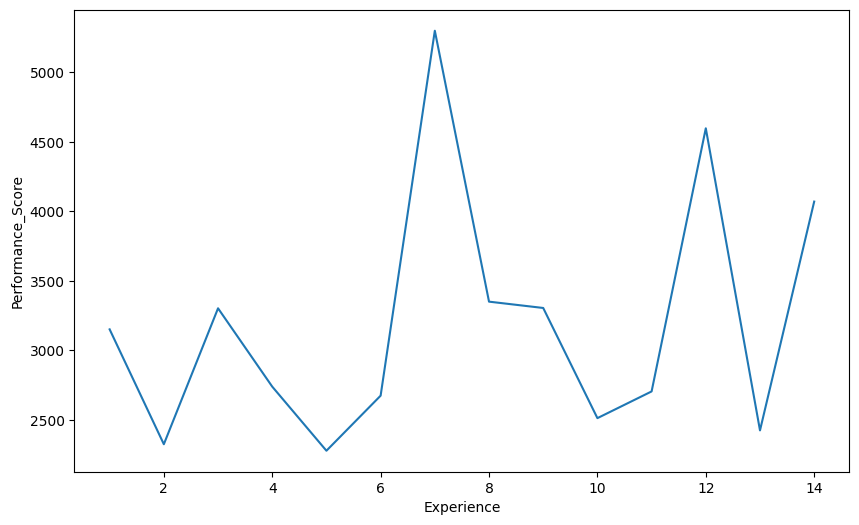

In [ ]:
plt.figure(figsize=(10, 6))
df_copy_3.groupby('Experience')['Performance_Score'].sum().plot()
plt.xlabel('Experience')
plt.ylabel('Performance_Score')
plt.show()

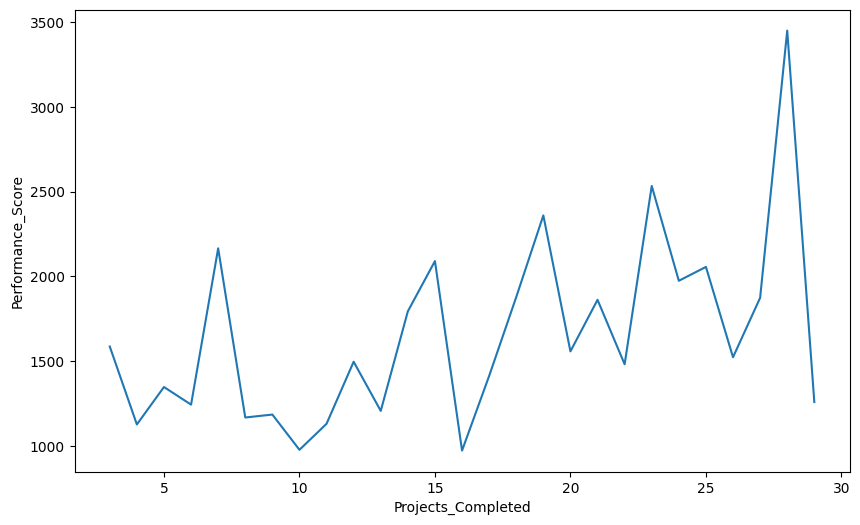

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Projects_Completed')['Performance_Score'].sum().plot()
plt.xlabel('Projects_Completed')
plt.ylabel('Performance_Score')
plt.show()

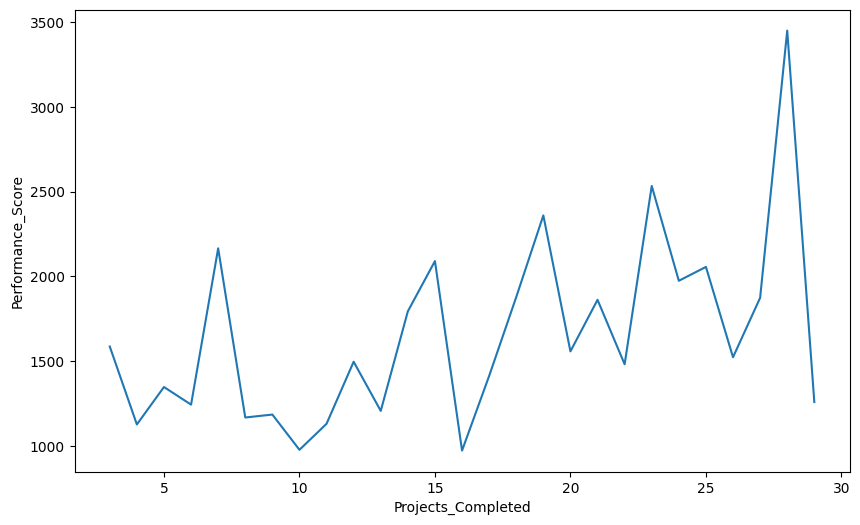

In [53]:
plt.figure(figsize=(10, 6))
df_copy.groupby('Projects_Completed')['Performance_Score'].sum().plot()
plt.xlabel('Projects_Completed')
plt.ylabel('Performance_Score')
plt.show()

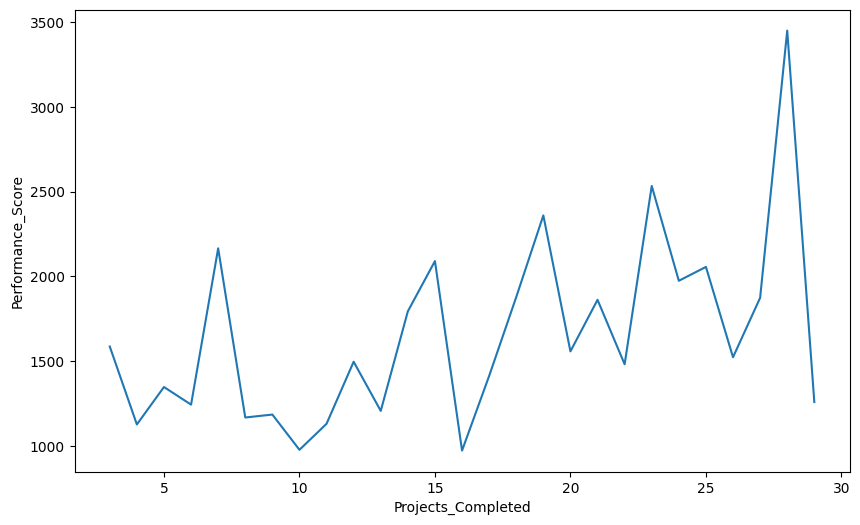

In [54]:
plt.figure(figsize=(10, 6))
df_copy_2.groupby('Projects_Completed')['Performance_Score'].sum().plot()
plt.xlabel('Projects_Completed')
plt.ylabel('Performance_Score')
plt.show()

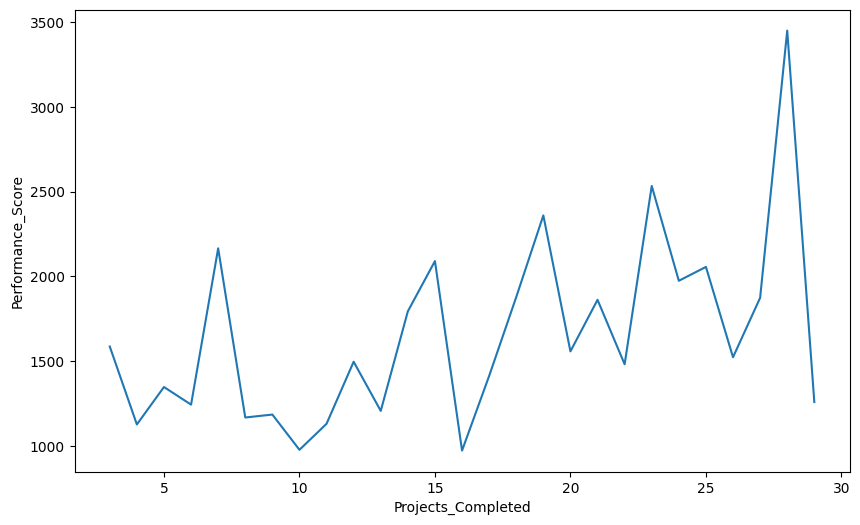

In [55]:
plt.figure(figsize=(10, 6))
df_copy_3.groupby('Projects_Completed')['Performance_Score'].sum().plot()
plt.xlabel('Projects_Completed')
plt.ylabel('Performance_Score')
plt.show()

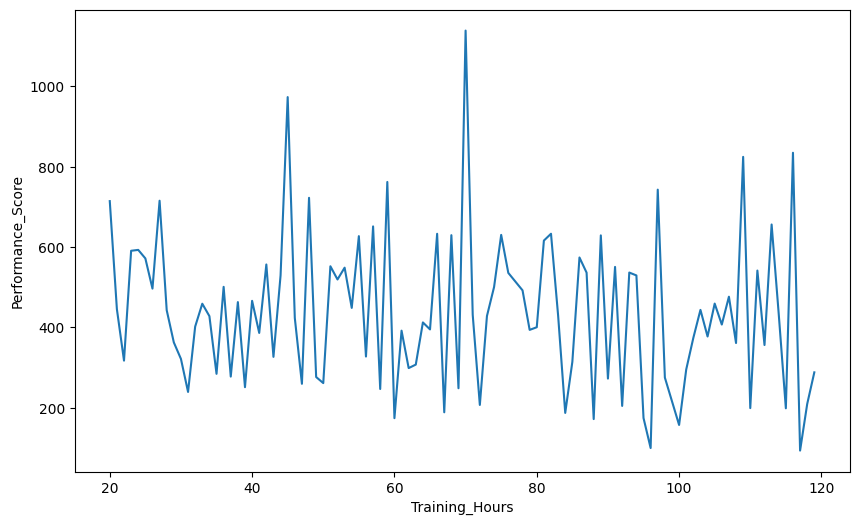

In [56]:
plt.figure(figsize=(10,6))
df.groupby('Training_Hours')['Performance_Score'].sum().plot()
plt.xlabel('Training_Hours')
plt.ylabel('Performance_Score')
plt.show()

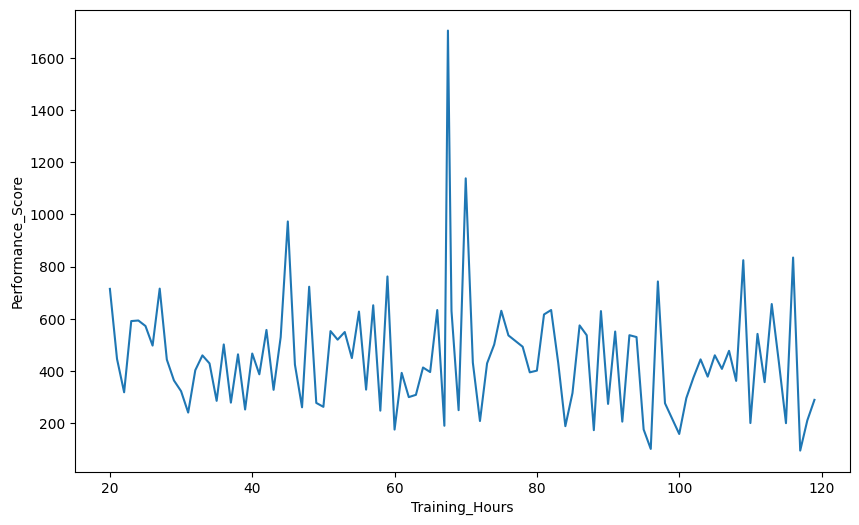

In [57]:
plt.figure(figsize=(10, 6))
df_copy.groupby('Training_Hours')['Performance_Score'].sum().plot()
plt.xlabel('Training_Hours')
plt.ylabel('Performance_Score')
plt.show()

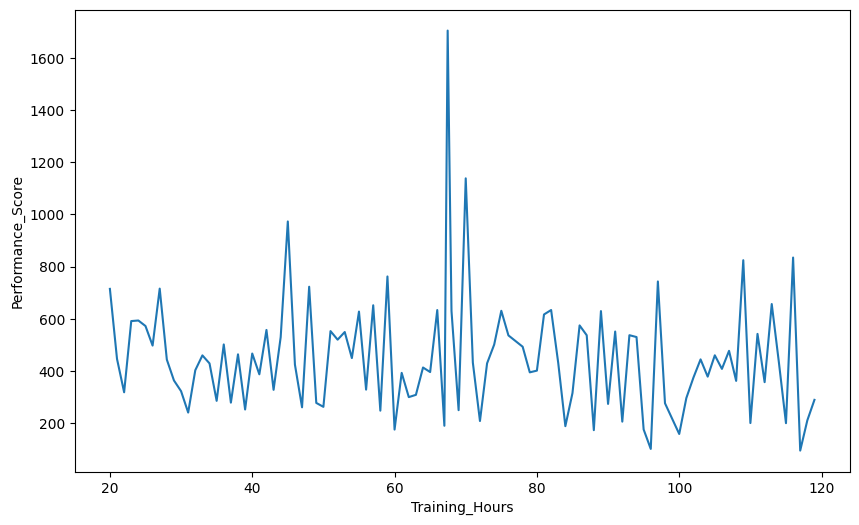

In [58]:
plt.figure(figsize=(10, 6))
df_copy_2.groupby('Training_Hours')['Performance_Score'].sum().plot()
plt.xlabel('Training_Hours')
plt.ylabel('Performance_Score')
plt.show()

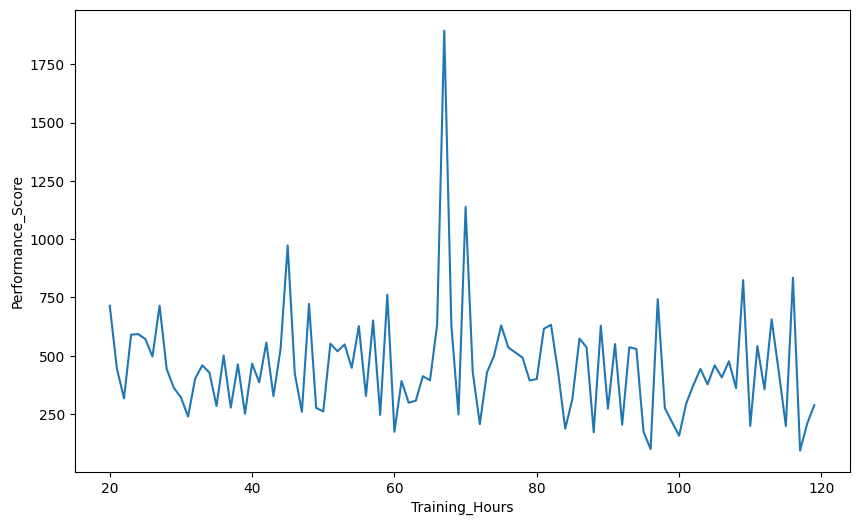

In [59]:
plt.figure(figsize=(10, 6))
df_copy_3.groupby('Training_Hours')['Performance_Score'].sum().plot()
plt.xlabel('Training_Hours')
plt.ylabel('Performance_Score')
plt.show()

**5. Run linear regression model on the dataset**

In [61]:
from itertools import count
#5. Run linear regression model on the dataset
x = df_copy_3.drop(columns = ['Education', 'Department', 'Performance_Score'])
y = df_copy_3['Performance_Score']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(x_test)
print(y_test)


     Experience  Projects_Completed  Training_Hours
249        12.0                28.0            85.0
433         3.0                20.0            97.0
19          6.0                 8.0           111.0
322        14.0                24.0            81.0
332         2.0                 8.0            56.0
..          ...                 ...             ...
106        13.0                26.0            78.0
270        14.0                24.0            67.0
348         8.0                19.0           109.0
435         1.0                 3.0            85.0
102         9.0                 7.0            71.0

[400 rows x 3 columns]
     Experience  Projects_Completed  Training_Hours
361        14.0                 7.0            92.0
73          7.0                17.0            34.0
374         4.0                24.0            57.0
155         8.0                 6.0            87.0
104         8.0                 6.0            67.0
..          ...                 ...     

In [63]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [66]:
#LR Error

lr_mae =mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print('MAE Linear Regression: ', lr_mae)
print('MSE Linear Regression: ',lr_mse)
print('RMSE Linear Regression: ',lr_rmse)

MAE Linear Regression:  4.349653852845878
MSE Linear Regression:  29.832607777126118
RMSE Linear Regression:  5.4619234503173075
